<a href="https://colab.research.google.com/github/ananya-bajaj-DS/Kaggle/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Exploration

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
177


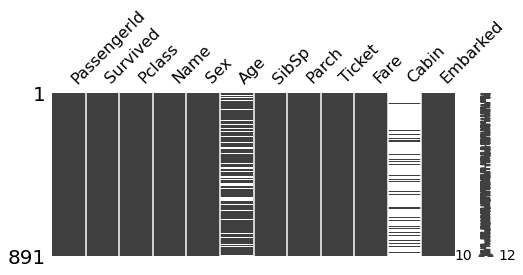

In [ ]:
display(train.describe())
#Missing Values Check
import missingno as msno
%matplotlib inline

msno.matrix(train, figsize=(8,3))

#Here we understand that Age and Cabin has the most missing data
#Let us also count the missing values in each column/variable

Null_counts=train.isna().sum()
print(Null_counts)
print(Null_counts['Age'])

In [ ]:
#Lets create two separate dataframes : df_bin, df_con
#df_bin: stroes discretaized continuous values, example: 0-100 divided into 0-10, 10-20, 20-30... and assign lables to each bin - 0-10: 1, 10-20: 2 and so on...
#df_cont: will have as is values for the most part

df_bin=pd.DataFrame()
df_con=pd.DataFrame()

In [ ]:
#Let's attack each variable one by one


Passenger ID

In [ ]:
Null_counts['PassengerId']
#Since there are no null values we dont have to deal with missing data, but also it is unique for every row obviously so we dont have to keep it/ not a fetaure exactly

0

Target Variable: Survived

Nulls in survived column: 0
0    549
1    342
Name: Survived, dtype: int64
   Survived
0         0
1         1
2         1
3         1
4         0


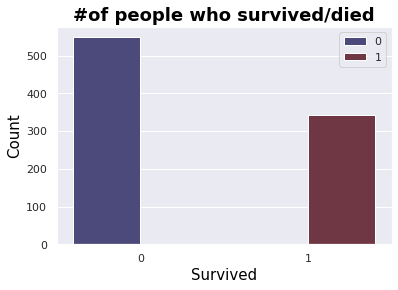

In [ ]:
#Target Class - Survived - Let's Visualize the counts etc. so we know what our result should look like when tested
print('Nulls in survived column:', Null_counts['Survived'])
print(train['Survived'].value_counts()) #This shows that more people died than survived, our final result should be in line with that
sns.set_theme(style='darkgrid')
sns.color_palette("Spectral", as_cmap=True)

#Here hue is helping create the legend. SO adding survived means it will take the categorical colors 
chart = sns.countplot(data=train, x='Survived',hue='Survived',palette="icefire", orient="H", saturation=0.75)
chart.legend(loc="upper right")
chart.set_title('#of people who survived/died', fontsize=18, fontweight='bold', color='Black')
chart.set_xlabel('Survived', fontsize=15, color='Black')
chart.set_ylabel('Count', fontsize=15, color='Black')

#Add the Target Variable Survived to df_bin and df_con: Since it is already segmented we can add as is to both
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

print(df_bin.head())

Feature #1: Pclass

# of nulls in Pclass:  0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64
   Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3


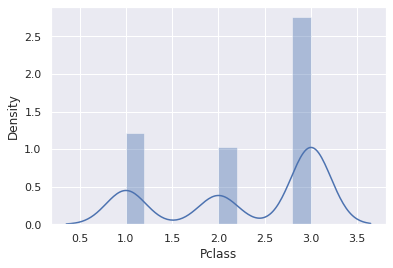

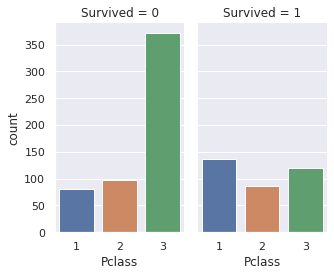

In [ ]:
print('# of nulls in Pclass: ',Null_counts['Pclass'])
train.head(10)
sns.distplot(train.Pclass)
#Can remove anlomolous data points by checking the distribution

sns.catplot(data=train, x="Pclass", col="Survived",kind="count", height=4, aspect=.6)
print(train.dtypes)
#Since pclass and survived are both int we cant put them in string below
print(train.groupby([train.Pclass,train.Survived]).count().PassengerId)
#Most People who died were 3rd class passenger and relatively more number of first class survived

#Now this is already seggrated by 1,2,3 so on so forth (already binned into 3 categories) we can add it as is to df_bin and dif_cont
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']
print(df_con.head())

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Feature 3: Name

In [ ]:
UniqueNames=len(train.Name.unique())
TotalRows=len(train)

print(UniqueNames, TotalRows)
#Since thes etwo are equal we cant do muc with it - if we didnt have gender we could have ectract mrs., ms. etc to categorise those
#For now, its useless feature and doesnt really imact survival so we let it go 

891 891


Feature 4: Sex

male      577
female    314
Name: Sex, dtype: int64
   Survived  Pclass  Sex
0         0       3    0
1         1       1    1
2         1       3    1
3         1       1    1
4         0       3    0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


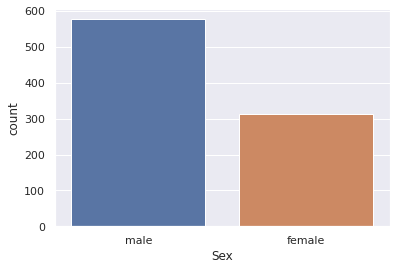

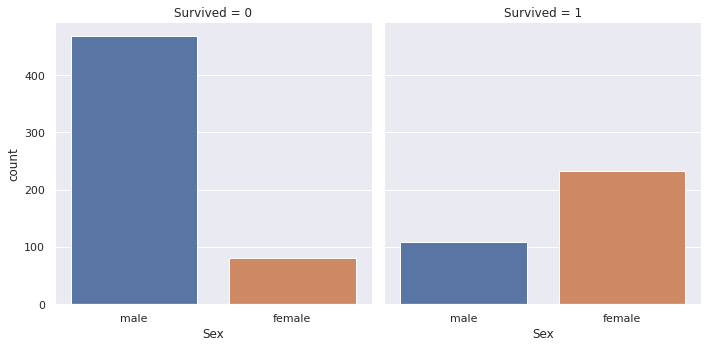

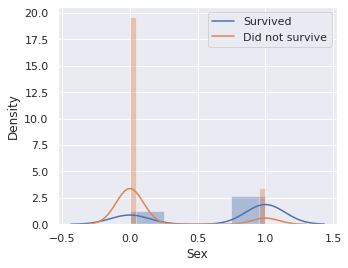

In [ ]:
Null_counts.Sex
print(train.Sex.value_counts())
#Hence no null values
sns.countplot(data=train,x="Sex")
sns.catplot(data=train, x="Sex",col="Survived",kind="count",label=True)
#Here we can conclude that more females survived as compared to males

#Since it is a categorical variable we need to change it to 0 and 1 for df_bin 
df_con['Sex'] = train['Sex']

#Instead of using a LabelEncoder, we could have also done df_bin['Sex']=np.where(train['Sex']=='Female',1,0)

# from sklearn.preprocessing import LabelEncoder
# LE = LabelEncoder()
# df_bin['Sex'] = LE.fit_transform(train['Sex'])
# display(df_bin.head())

#But also there is some confusion which is male and which is mapped to female so I am going to use Youtube's way to go about this-
df_bin['Sex']=np.where(train['Sex']=='female',1,0)
print(df_bin.head())
#.loc is used for (row_name,col_name), here we have row conditon, [col_name]
# sns.displot(df_bin.loc[(df_bin.Survived==0),['Sex']], kde_kws={'label':'Survived'})
# sns.displot(df_bin.loc[(df_bin.Survived==1),['Sex']], kde_kws={'label':'Died'})

# sns.displot(df_bin.loc[:,['Sex','Survived']],x="Sex",hue="Survived", kde=True)

fig = plt.figure(figsize=(5, 4))
chart=sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
chart=sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});
chart.legend(loc="upper right")



Feature 5: Age

In [ ]:
Null_counts.Age

177

In [ ]:

# display(train.head())
from sklearn.impute import SimpleImputer #Imported the SimpleImputer "Class"
SI = SimpleImputer(missing_values=np.nan, strategy='mean') #Created an object called SI of SimpleImputer Class
train.iloc[:,5:6] = SI.fit_transform(train.iloc[:,5:6]) #Fit is used to calculate the particular data, Transform to Apply it


df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
df_con['Age'] = train['Age'] # non-bucketed

display(df_bin.head(10))

,Survived,Pclass,Sex,Age
0,0,3,0,"(16.336, 24.294]"
1,1,1,1,"(32.252, 40.21]"
2,1,3,1,"(24.294, 32.252]"
3,1,1,1,"(32.252, 40.21]"
4,0,3,0,"(32.252, 40.21]"
5,0,3,0,"(24.294, 32.252]"
6,0,1,0,"(48.168, 56.126]"
7,0,3,0,"(0.34, 8.378]"
8,1,3,1,"(24.294, 32.252]"
9,1,2,1,"(8.378, 16.336]"


Feature 6: Sibsp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


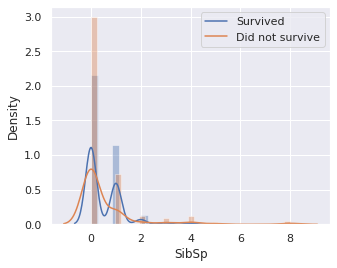

In [ ]:
display(train.head())

df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

fig = plt.figure(figsize=(5, 4))
chart=sns.distplot(df_bin.loc[train['Survived'] == 1]['SibSp'], kde_kws={'label': 'Survived'});
chart=sns.distplot(df_bin.loc[train['Survived'] == 0]['SibSp'], kde_kws={'label': 'Did not survive'});
chart.legend(loc="upper right")

#So basically chances of survival are higher if one has 1-2 sposuses/siblings

Feature 7: Parch (Parents/Children)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

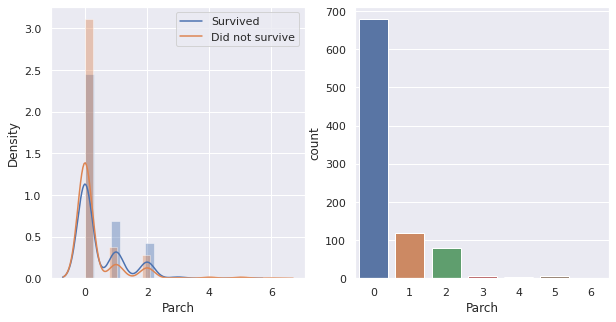

In [ ]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1) #This is subplots in one box - so 1 row, 2 columns side by side charts: last 1 means first plot
chart=sns.distplot(df_bin.loc[train['Survived'] == 1]['Parch'], kde_kws={'label': 'Survived'});
chart=sns.distplot(df_bin.loc[train['Survived'] == 0]['Parch'], kde_kws={'label': 'Did not survive'});
chart.legend(loc="upper right")

plt.subplot(1,2,2) #This is subplots in one box - so 1 row, 2 columns side by side charts: last 2 means second plot
sns.countplot(df_bin.Parch)

plt.show()
#Similar trend as sibsp

Feature 8: Ticket

In [ ]:
print(train.Ticket.value_counts())
print(len(train.Ticket.unique()))
Null_counts.Ticket
#So we dont have any nulls howver we have 681 unique values, which is quite useless but another way would be to extract maybe see the letters numbers for now lets just leave this feature
display(train.head(20))

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
681


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


Feature 9: fare

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

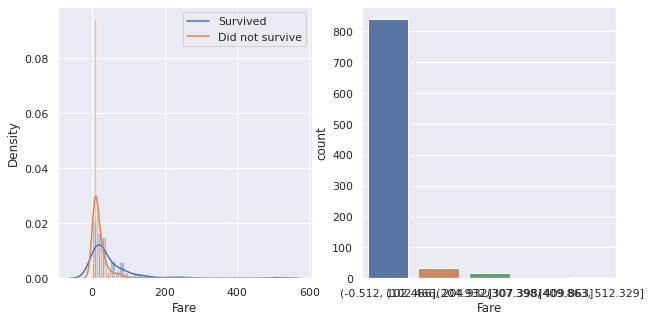

In [ ]:
Null_counts.Fare


df_bin['Fare'] = pd.cut(train['Fare'], 5)
df_con['Fare']=train['Fare']
df_bin.Fare.value_counts()

fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1) #This is subplots in one box - so 1 row, 2 columns side by side charts: last 1 means first plot
chart=sns.distplot(train.loc[train['Survived'] == 1]['Fare'], kde_kws={'label': 'Survived'});
chart=sns.distplot(train.loc[train['Survived'] == 0]['Fare'], kde_kws={'label': 'Did not survive'});
chart.legend(loc="upper right")

plt.subplot(1,2,2) #This is subplots in one box - so 1 row, 2 columns side by side charts: last 2 means second plot
sns.countplot(df_bin.Fare)

plt.show()

#Higher the fare more chance of survival (nearly 100)

Feature 9: Cabin

In [ ]:
Null_counts.Cabin #Too many null values lets leave it for now 

687

Feature 10:Embarked

In [ ]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

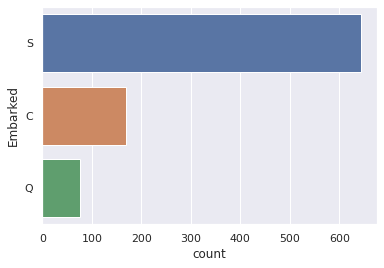

In [ ]:
sns.countplot(y='Embarked', data=train)
train.Embarked.value_counts()
Null_counts.Embarked
#Lets drop the two nulls
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])

Feature Encoding

In [ ]:
# We will one Hot Encode the df_bin dataframe and Label encode the df_con dataframe. 
# Reason for that is: df_bin we have categorized into finite bins so they can be one hot encoded as [0 1 1 1] depending on the number of categories
# Reason for that is: df_con we will label encode because it will provide a unique code for each for instance for fares it might label all 72.5 dollars to code no. 18
display(df_bin.head())

#Starting with df_bin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

ct = ColumnTransformer(transformers=[('OHE',OneHotEncoder(),[1,2,3,4,5,6,7])],remainder='passthrough') 
df_bin_enc=np.array(ct.fit_transform(df_bin))
print(df_bin_enc)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S


  (0, 2)	1.0
  (0, 3)	1.0
  (0, 7)	1.0
  (0, 16)	1.0
  (0, 22)	1.0
  (0, 29)	1.0
  (0, 35)	1.0
  (1, 0)	1.0
  (1, 4)	1.0
  (1, 9)	1.0
  (1, 16)	1.0
  (1, 22)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 36)	1.0
  (2, 2)	1.0
  (2, 4)	1.0
  (2, 8)	1.0
  (2, 15)	1.0
  (2, 22)	1.0
  (2, 29)	1.0
  (2, 35)	1.0
  (2, 36)	1.0
  (3, 0)	1.0
  (3, 4)	1.0
  :	:
  (885, 29)	1.0
  (885, 35)	1.0
  (885, 36)	1.0
  (886, 2)	1.0
  (886, 4)	1.0
  (886, 8)	1.0
  (886, 16)	1.0
  (886, 24)	1.0
  (886, 29)	1.0
  (886, 35)	1.0
  (887, 0)	1.0
  (887, 3)	1.0
  (887, 8)	1.0
  (887, 15)	1.0
  (887, 22)	1.0
  (887, 29)	1.0
  (887, 33)	1.0
  (887, 36)	1.0
  (888, 2)	1.0
  (888, 3)	1.0
  (888, 8)	1.0
  (888, 15)	1.0
  (888, 22)	1.0
  (888, 29)	1.0
  (888, 34)	1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

#Transforms column into [0,1,1] form. We are transforming one column to multiple columns based on the number of categories 
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False),[1,2,3,4,5,6,7])],remainder='passthrough')
#For training purposes we need numpy array 
df_bin_enc=np.array(ct.fit_transform(df_bin))
display(pd.DataFrame(df_bin_enc))

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
885,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
886,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#Here is says labelencoding can only be done on a 1-D array (like a test column) whatever issues, 
#basically one hot encoding is donw when categorical variable sare there which have no numeric relationship between them, 
#for instance if we label encoding column Country - France Germany and Spain: It will change it to 0, 1 and 2 respectively. 
#However, our model might thing 2>1>0 which is untrue and makes no sense, so in this case we one hot encode
#Here survived is y or target so we can leave for now
# Pclass needs to be one Hot Encoded: no numerical relationship & not binary
# Sex: Can Label Encode bec only binary values like male female is present
# Age: We can leave as is
# SipSp: No. of siblings/spouses: I think we can leave this as is since numerical 
# Parch: No. of parents/children: I think we can leave this as is since numerical
# Fare: Numerical already can leave as is (or maybe label encode)
#EMbarked: One Hot encode
from sklearn.preprocessing import LabelEncoder

#IMPORTANT- we cant use label encoder within column transformer bec it takes   only one argument - an array or single column df, therefore here we OHE sex for now
#Can OHE like above OR use get_dummies method
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False),[1,2,7])],remainder='passthrough')
#For training purposes we need numpy array 
df_con_enc=np.array(ct.fit_transform(df_con))
display(pd.DataFrame(df_con_enc))


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,22.000000,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,38.000000,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,26.000000,0.0,0.0,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.000000,0.0,0.0,13.0000
885,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,19.000000,0.0,0.0,30.0000
886,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,29.699118,1.0,2.0,23.4500
887,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,26.000000,0.0,0.0,30.0000


In [ ]:
df_bin.dtypes

Survived       int64
Pclass         int64
Sex            int64
Age         category
SibSp          int64
Parch          int64
Fare        category
Embarked      object
dtype: object